In [1]:
# passo 1 - importar e visualizar o dataset
import pandas as pd

tabela = pd.read_csv('house_price_regression_dataset.csv')
display(tabela.head(4))
display(tabela.info())
display(tabela.nunique())
tabela.describe()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.852274
1,4272,3,3,2016,4.753014,1,6,985260.854490
2,3592,1,2,2016,3.634823,0,9,777977.390119
3,966,1,2,1977,2.730667,1,8,229698.918664


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


None

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [10]:
# passo 2 - explorar os dados
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

correlacao = tabela['House_Price'].corr(tabela['Square_Footage'])
print(f'Correlacao entre o preco da casa e a area da casa: {correlacao:.2f}')
correlacao2 = tabela['House_Price'].corr(tabela['Lot_Size'])
print(f'Correlacao entre o preco da casa e o Lot Size: {correlacao2:.2f}')

print(f'Media dos precos: {tabela['House_Price'].mean():.2f}')

Correlacao entre o preco da casa e a area da casa: 0.99
Correlacao entre o preco da casa e o Lot Size: 0.16
Media dos precos: 618861.02


<Axes: xlabel='House_Price', ylabel='Square_Footage'>

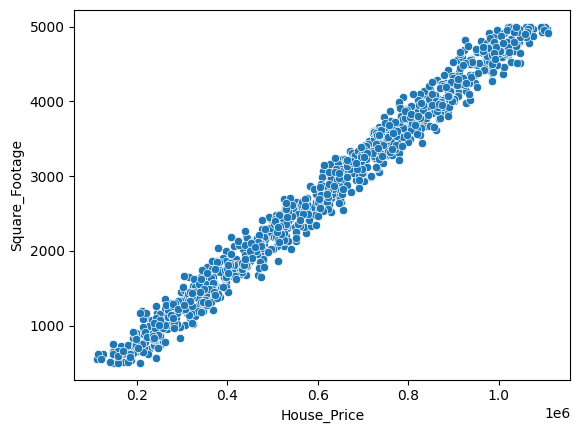

In [3]:
sns.scatterplot(tabela, x='House_Price', y='Square_Footage')

<Axes: >

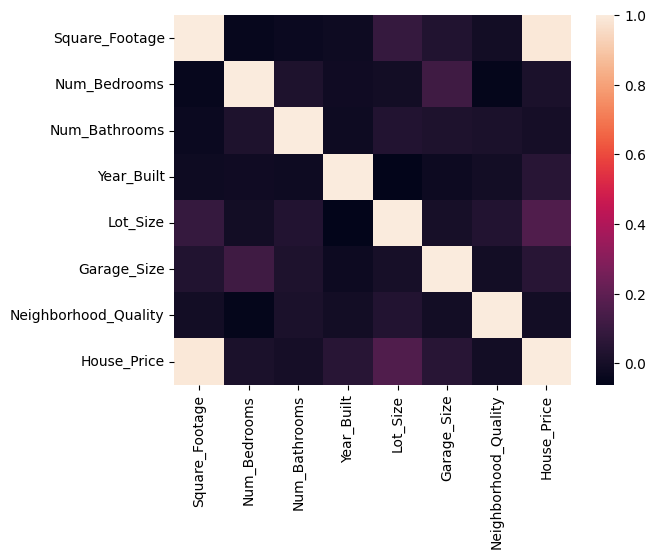

In [4]:
sns.heatmap(tabela.corr())

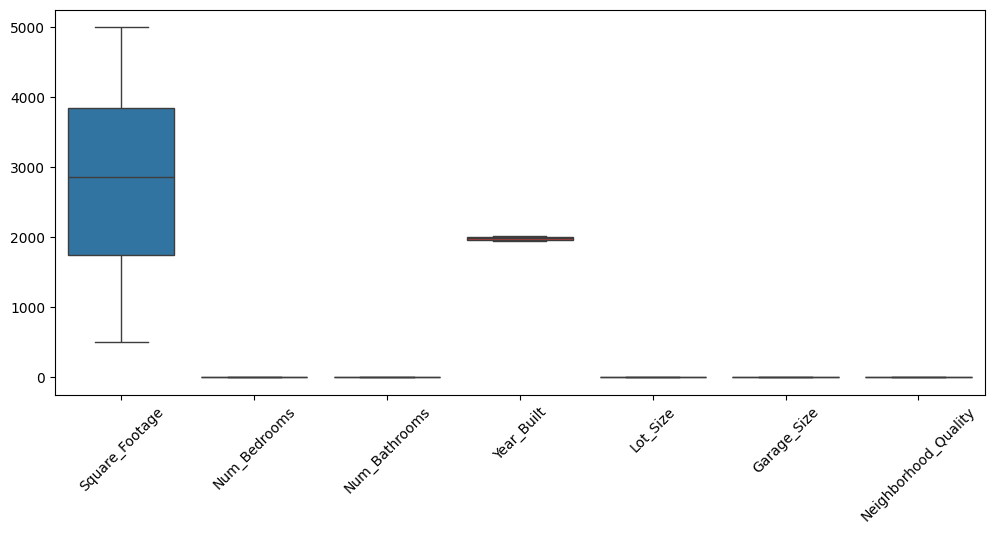

In [5]:
new = tabela.drop(columns='House_Price')

plt.figure(figsize=(12,5))
sns.boxplot(new)
plt.xticks(rotation=45)
plt.show()

In [6]:
# passo 3 - limpar e preparar os dados
import numpy as np

tabela = tabela.drop(
    columns=[
    'Neighborhood_Quality',
    'Num_Bathrooms',
    'Num_Bedrooms',
    'Garage_Size'
    ]
)
bins = [0 , 1600, 3999, np.inf]
labels = ['baixo', 'medio', 'alto']
tabela['Square_Footage_Category'] = pd.cut(tabela['Square_Footage'], bins=bins, labels=labels)
tabela['Square_Footage_Category'] = tabela['Square_Footage_Category'].map({'baixo': 0,
                                                                           'medio': 1,
                                                                           'alto': 2})

tabela.to_csv('preparado_house_price_regression_dataset.csv')

In [7]:
# passo 4 - separar os dados de teste e treino e treinar o modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet

X = tabela.drop(columns='House_Price')
y = tabela['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [8]:
# regressao linear regularizada

modelo_linear = ElasticNet(alpha=0.1, l1_ratio=0.5)
# alpha -> grau de regularizacao
# l1_ratio -> equilibrio entre Rigde e Lasso (L2 -> reduzir coeficientes grandes, e L1 -> zerar coeficientes irrelevantes)

modelo_linear.fit(X, y)

pred_linear = modelo_linear.predict(X_test)

In [9]:
# metricas da regressao linear

MAE_linear = mean_absolute_error(y_test, y_pred=pred_linear)
RMSE_linear = np.sqrt(mean_squared_error(y_test, y_pred=pred_linear))
R2_linear = r2_score(y_test, y_pred=pred_linear)
cross_linear = (cross_val_score(modelo_linear, X, y, cv=5)).mean()

print(f'Erro absoluto médio: {MAE_linear:.2f}')
print(f'Raiz do erro quadratico médio: {RMSE_linear:.2f}')
print(f'Coeficiente de Determinação: {R2_linear:.2f}')
print(f'Validação cruzada de Regressao Linear: {cross_linear}')

# obteve um percentual de erro de 2.59% do preco real

NameError: name 'mean_absolute_error' is not defined

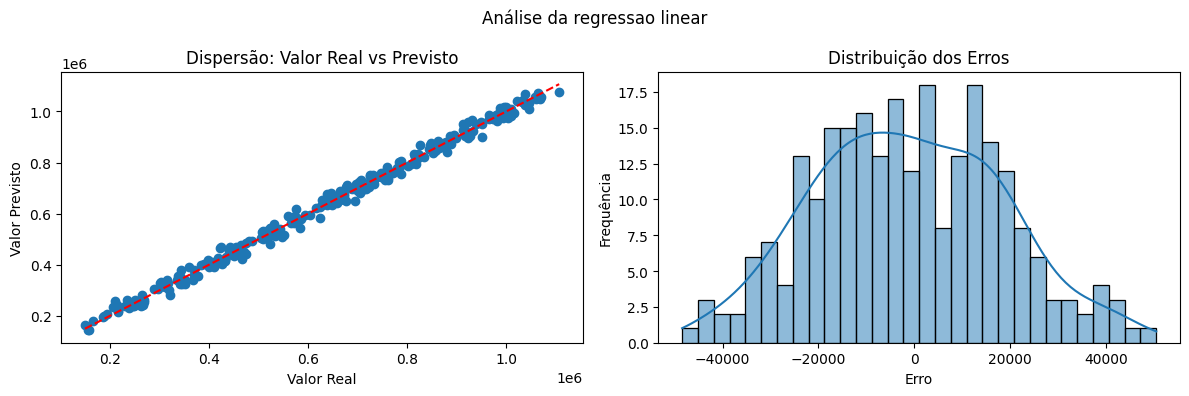

In [ ]:
# visualizacoes na regressao linear
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.suptitle("Análise da regressao linear")

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_linear) # cria grafico de dispersao entre os valores reais e previsto
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Dispersão: Valor Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plota uma linha tracejada representando a linha ideal onde o valor real = valor previsto

plt.subplot(1, 2, 2)
erros = y_test - pred_linear # calcula os erros (residuos) subtraindo os valores prvistos dos reais
sns.histplot(erros, bins=30, kde=True) # histograma com densidade(kde = True) para visualizar as distribuição dos erros
plt.title("Distribuição dos Erros")
plt.xlabel('Erro')
plt.ylabel('Frequência')

plt.savefig("images/AnaliseRegressao linear.png", dpi=300, bbox_inches='tight')
# dpi=300 -> define a resolucao da imagem
# bbox_inches='tight' -> remove espacos em branco desnecessarios ao redor da imagem

plt.tight_layout()
plt.show()

In [ ]:
# salvando o modelo

import pickle
with open("Linear Regression.pkl", "wb") as f:
    pickle.dump(modelo_linear, f)